# [WUM] PD6
## Kacper Kurowski

Załadujmy paczki i zbiór danych

In [3]:
from sklearn.datasets import fetch_olivetti_faces

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [4]:
faces = fetch_olivetti_faces()

Pokażmy kilka twarzy

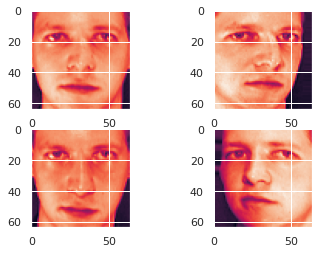

In [5]:

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow( faces.images[0])
axs[0, 1].imshow( faces.images[1])
axs[1, 0].imshow( faces.images[2])
axs[1, 1].imshow( faces.images[3])
plt.show()

Określmy wymiary zbioru danych

In [6]:
faces.images.shape

(400, 64, 64)

Ustawmy liczbę komponentów tak, by pca wyjaśniał 95% zmienności danych

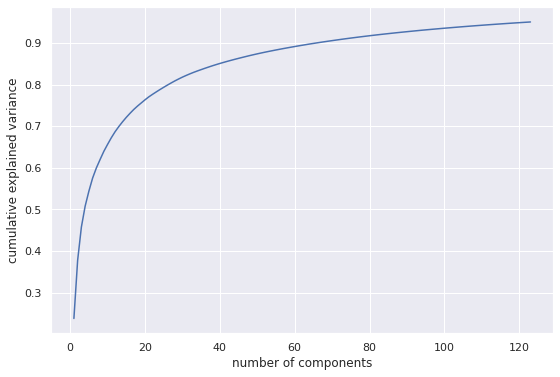

In [14]:
from sklearn.decomposition import PCA
pca = PCA( n_components = 0.95).fit( faces.images.reshape(400, 64*64))

plt.figure(figsize=(9,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');



In [15]:
len( pca.components_)

123

In [16]:
transformed = pca.transform(faces.images.reshape(400, 64*64))

Obliczmy stopień kompresji

In [17]:
faces.images.shape

(400, 64, 64)

In [18]:
transformed.shape

(400, 123)

stopień kompresji to:

In [19]:
64*64/123

33.300813008130085

Przeprowadźmy transformację odwrotną

In [20]:
returned = pca.inverse_transform( transformed).reshape(400, 64,64)

In [21]:
returned.shape

(400, 64, 64)

twarze po transformacji

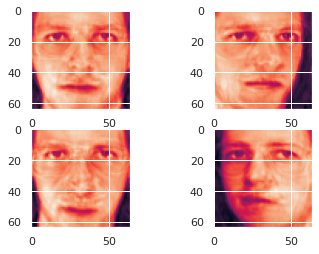

In [22]:

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow( returned[0])
axs[0, 1].imshow( returned[1])
axs[1, 0].imshow( returned[2])
axs[1, 1].imshow( returned[3])
plt.show()

Obliczmy błąd rmse

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error( faces.images.reshape(400, 64*64), returned.reshape(400, 64*64))

0.00095588237

Jak widać, jest dość mały.

Dokonajmy następnie kilku transformacji zdjęć.

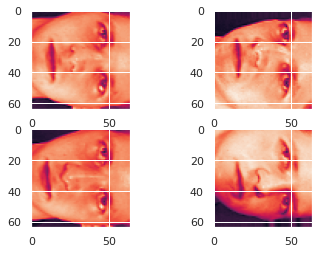

In [24]:
from PIL import Image
  
rotated = []
for i in range( 20):
    img = Image.fromarray(faces.images[i])
  
    # flip clockwise 
    rotated.append( np.asarray(img.transpose(Image.TRANSVERSE)))
  
rotated = np.array( rotated)

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow( rotated[0])
axs[0, 1].imshow( rotated[1])
axs[1, 0].imshow( rotated[2])
axs[1, 1].imshow( rotated[3])
plt.show()

i obliczmy błędy rmse po zastosowaniu transformacji odwrotnej

In [25]:
mean_squared_error( rotated.reshape( 20, 64*64), pca.inverse_transform( pca.transform( rotated.reshape( 20, 64*64))))

0.0083987545

Błąd, jak widać, trochę się zwiększył. Dokonajmy podobnej analizy dla innych transformacji zdjęć.

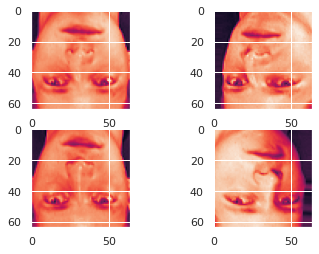

In [27]:
from PIL import Image
  
flipped = []
for i in range( 20):
    img = Image.fromarray(faces.images[i])
  
    # flip clockwise 
    flipped.append( np.asarray(img.rotate( 180)))
  
flipped = np.array( flipped)

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow( flipped[0])
axs[0, 1].imshow( flipped[1])
axs[1, 0].imshow( flipped[2])
axs[1, 1].imshow( flipped[3])
plt.show()

In [28]:
mean_squared_error( flipped.reshape( 20, 64*64), pca.inverse_transform( pca.transform( flipped.reshape( 20, 64*64))))

0.007692051

Widzimy zatem, że błąd jest większy niż wyjsciowy, ale mniejszy niż w przypadku wcześniejszej transformacji.

In [29]:
import PIL.ImageOps 

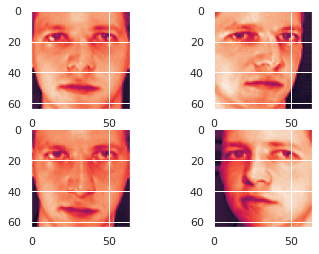

In [30]:
from PIL import Image
  
darkened = []
for i in range(20):
    # flip clockwise 
    darkened.append( 0.01*faces.images[i])
  
darkened = np.array( darkened)

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow( darkened[0])
axs[0, 1].imshow( darkened[1])
axs[1, 0].imshow( darkened[2])
axs[1, 1].imshow( darkened[3])
plt.show()

In [31]:
mean_squared_error( darkened.reshape( 20, 64*64), pca.inverse_transform( pca.transform( darkened.reshape( 20, 64*64))))

0.0014527752

Tym razem błąd jest niewiele większy od wyjściowego

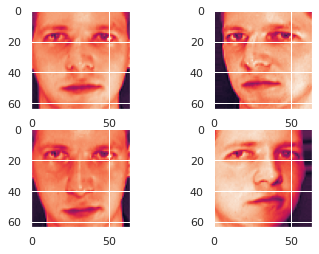

In [32]:
from PIL import Image
  
flip_vert = []
for i in range( 20):
    img = Image.fromarray(faces.images[i])
  
    # flip clockwise 
    flip_vert.append( np.asarray(img.transpose( PIL.Image.FLIP_LEFT_RIGHT)))
  
flip_vert = np.array( flip_vert)

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow( flip_vert[0])
axs[0, 1].imshow( flip_vert[1])
axs[1, 0].imshow( flip_vert[2])
axs[1, 1].imshow( flip_vert[3])
plt.show()



In [33]:
mean_squared_error( flip_vert.reshape( 20, 64*64), pca.inverse_transform( pca.transform( flip_vert.reshape( 20, 64*64))))

0.003264396

Zdaje się, że PCA może posłużyć do wykrywania anomalii spowodowaych znaczącymi zmianami w zdjeciach --- takimi jak odbicia względem osi poziomej, czy rotacje. 

Znacznie gorzej sobie radzi w sytuacji "nieznacznych" zmian zdjęć takich jak odbicia względem linii pionowej, czy pewne przyciemnienie obrazu. Zmiany te intuicyjnie nie zmieniają twarzy tak mocno, jak robiły to wcześniej wymienione przekształcenia.

Zatem, jeżeli nauczyliśmy pca na twarzach "nieprzekręconych", "nieobróconych" itp., to tego typu zmiany pca będzie mogło wykrywać. Powinno też wykrywać zmiany innego typu, np. zbyt jasne piksele, których nie możnaby wytłumaczyć poprzez np. padające na twarz światło.